In [2]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [4]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('3_RoadClassifications_v2020.csv', dtype = str, index_col = 0)
print(report.columns)
print(report.shape)

Index(['feature_id', 'site_id', 'site_name', 'locality', 'town', 'location',
       'hierarchy', 'roadclass', 'customer', 'area_name', 'distance', 'ward',
       'road_type_hw', 'urban_rural', 'feat_cent_east', 'feat_cent_north',
       'ward_code', 'surf_type', 'width', 'road_type', 'road_hierarchy',
       'feature_key'],
      dtype='object')
(19614, 22)


In [5]:
report.head(5)

,feature_id,site_id,site_name,locality,town,location,hierarchy,roadclass,customer,area_name,distance,ward,road_type_hw,urban_rural,feat_cent_east,feat_cent_north,ward_code,surf_type,width,road_type,road_hierarchy,feature_key
asset_id,,,,,,,,,,,,,,,,,,,,,,
HWCW524005,0U1/10,43000150,Acacia Street,NaN,Hatfield,Grove Lea to Nos 49 - 101,L2 Local Access,Unclassified Road - U,HH: Hertfordshire Highways,MW: 0-Welwyn Hatfield Area,276,Hatfield South,Single 2-Lane Carriageway,Urban,522204.77,206787.87,ED76,BITM,9.23,S2,4B,393127
HWCW524006,0U1/20,43000150,Acacia Street,NaN,Hatfield,No 3 to Northdown Road,L2 Local Access,Unclassified Road - U,HH: Hertfordshire Highways,MW: 0-Welwyn Hatfield Area,49,Hatfield South,Single 2-Lane Carriageway,Urban,522192.83,206872.23,ED76,BITM,10.44,S2,4B,412116
HWCW524801,0U10/10,43000294,Aldock,NaN,Welwyn Garden City,Thumbswood To Opp No 8,L2 Local Access,Unclassified Road - U,HH: Hertfordshire Highways,MW: 0-Welwyn Hatfield Area,54,Welwyn Garden City South,Single 2-Lane Carriageway,Urban,525360.17,211444.81,ED78,BITM,9.76,S2,4B,412115
HWCW524802,0U10/20,43000294,Aldock,NaN,Welwyn Garden City,Opp No 10 To Opp No 4,L2 Local Access,Unclassified Road - U,HH: Hertfordshire Highways,MW: 0-Welwyn Hatfield Area,63,Welwyn Garden City South,Single 2-Lane Carriageway,Urban,525375.15,211469.76,ED78,BITM,10.46,S2,4B,449670
04047760,0U1000/10,43001565,Bessemer Road,NaN,Welwyn Garden City,Access to The Bakehouse PH parking,L2 Local Access,Unclassified Road - U,HH: Hertfordshire Highways,MW: 0-Welwyn Hatfield Area,13,Haldens,Carriageway Oneway 1-Lane,Urban,524348,213116,ED71,NaN,NaN,S1,4B,4047760


### Road classification counts: Urban vs Rural, Class, Hierarchy

In [6]:
report['urban_rural'].value_counts()

Urban    14155
Rural     5459
Name: urban_rural, dtype: int64

In [7]:
report['hierarchy'].value_counts()

L2 Local Access             16618
L1 Local Distributor         1120
MN Main Distributor           847
SD Secondary Distributor      643
PR Primary Distributor        353
L3 Surfaced PRoW               30
No Code Allocated               3
Name: hierarchy, dtype: int64

In [8]:
report['roadclass'].value_counts()


Unclassified Road - U           16629
Unnumbered Classified Rd - C     1221
Principal Road - A               1200
Numbered Classified Road - B      543
Not Allocated                      21
Name: roadclass, dtype: int64

In [9]:
report['area_name'].value_counts()

E: 3-East Herts District      3030
N: 5-North Herts District     2597
SW: 2-Dacorum Area            2547
MW: 6-St Albans Area          2232
MW: 0-Welwyn Hatfield Area    1856
N: 7-Stevenage Area           1741
E: 1-Broxbourne Area          1649
MW: 4-Hertsmere District      1624
SW: 8-3 Rivers District       1288
SW: 9-Watford Area            1050
Name: area_name, dtype: int64

In [10]:
#Show percentage of roads per town
report['town'].value_counts().head(15)

Stevenage                 1848
Hemel Hempstead           1411
St Albans                 1175
Watford                   1070
Welwyn Garden City         827
Bishop's Stortford         729
Cheshunt                   726
Hatfield                   662
Letchworth Garden City     538
Hitchin                    514
Harpenden                  509
Hertford                   483
Borehamwood                474
Hoddesdon                  393
Potters Bar                346
Name: town, dtype: int64

In [11]:
100*report['area_name'].value_counts(normalize=True)

E: 3-East Herts District      15.448149
N: 5-North Herts District     13.240542
SW: 2-Dacorum Area            12.985623
MW: 6-St Albans Area          11.379627
MW: 0-Welwyn Hatfield Area     9.462629
N: 7-Stevenage Area            8.876313
E: 1-Broxbourne Area           8.407260
MW: 4-Hertsmere District       8.279800
SW: 8-3 Rivers District        6.566738
SW: 9-Watford Area             5.353319
Name: area_name, dtype: float64

In [12]:
#Show percentage of roads per town
100*report['town'].value_counts(normalize=True).head(15)
#report.columns

Stevenage                 9.421842
Hemel Hempstead           7.193841
St Albans                 5.990619
Watford                   5.455287
Welwyn Garden City        4.216376
Bishop's Stortford        3.716733
Cheshunt                  3.701438
Hatfield                  3.375140
Letchworth Garden City    2.742939
Hitchin                   2.620577
Harpenden                 2.595085
Hertford                  2.462527
Borehamwood               2.416641
Hoddesdon                 2.003671
Potters Bar               1.764046
Name: town, dtype: float64

In [13]:
ans = report.groupby(['town'],as_index = False).size().sort_values(ascending = False).head(15).sum()
print('The instances covered by the top 37 codes are: ' + str(ans))
print('Which represents: '+str(round((ans*100)/report.shape[0]),) + '% of the total amount')

The instances covered by the top 37 codes are: 11705
Which represents: 60.0% of the total amount


### Length and width of roads

In [14]:
#Identify unique values to validate that feature_id has one record per set
report.describe()


,feature_id,site_id,site_name,locality,town,location,hierarchy,roadclass,customer,area_name,distance,ward,road_type_hw,urban_rural,feat_cent_east,feat_cent_north,ward_code,surf_type,width,road_type,road_hierarchy,feature_key
count,19614,19614,19614,737,19614,19610,19614,19614,19614,19614,19614,19614,19576,19614,19614,19614,19614,18427,18594,19516,19516,19614
unique,19614,11360,9154,91,257,18506,7,5,1,10,1824,78,17,2,19545,19554,78,6,1636,10,18,19614
top,0U1702/20,37821965,High Street,Great Ashby,Stevenage,Turning Circle,L2 Local Access,Unclassified Road - U,HH: Hertfordshire Highways,E: 3-East Herts District,50,Royston West & Rural,Single 2-Lane Carriageway,Urban,0,0,ED42,BITM,9.48,S2,4B,412413
freq,1,33,144,104,1848,21,16618,16629,19614,3030,169,456,17599,14155,5,5,456,16825,55,17986,16830,1


In [15]:
#Show length metrics of roads
report['distance'] = report['distance'].astype(float)
report['distance'].describe()

count    19614.000000
mean       261.399703
std        360.031160
min          0.000000
25%         63.000000
50%        125.000000
75%        295.000000
max       3696.000000
Name: distance, dtype: float64

In [16]:
out = pd.cut(report['distance'], bins=15)
out.value_counts().reindex(out.cat.categories)

(-3.696, 246.4]     13887
(246.4, 492.8]       2893
(492.8, 739.2]       1165
(739.2, 985.6]        632
(985.6, 1232.0]       396
(1232.0, 1478.4]      254
(1478.4, 1724.8]      140
(1724.8, 1971.2]      121
(1971.2, 2217.6]       45
(2217.6, 2464.0]       45
(2464.0, 2710.4]       19
(2710.4, 2956.8]        6
(2956.8, 3203.2]        5
(3203.2, 3449.6]        2
(3449.6, 3696.0]        4
Name: distance, dtype: int64

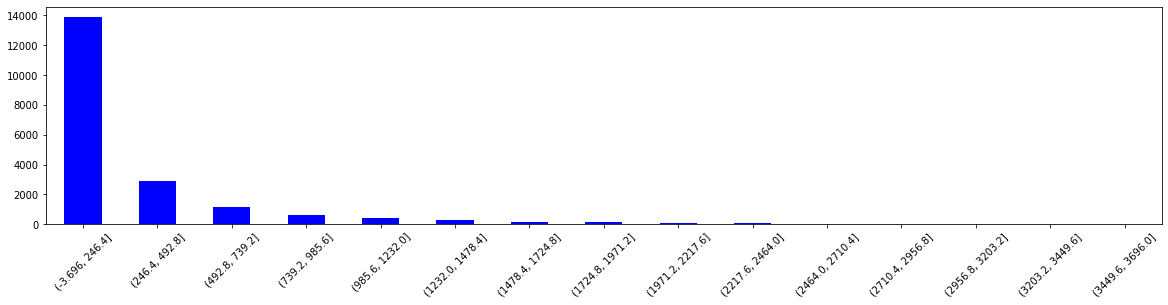

In [24]:
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,4))
plt.xticks(rotation=45)
plt.show()

In [18]:
#Show width metrics of roads
report['width'] = report['width'].astype(float)
report['width'].describe()

count    18594.000000
mean         9.379252
std          2.986671
min          0.000000
25%          7.760000
50%          9.400000
75%         10.930000
max         60.260000
Name: width, dtype: float64

In [19]:
out2 = pd.cut(report['width'], bins=10)
out2.value_counts().reindex(out2.cat.categories)

(-0.0603, 6.026]     2299
(6.026, 12.052]     13819
(12.052, 18.078]     2300
(18.078, 24.104]      148
(24.104, 30.13]        21
(30.13, 36.156]         3
(36.156, 42.182]        2
(42.182, 48.208]        0
(48.208, 54.234]        1
(54.234, 60.26]         1
Name: width, dtype: int64

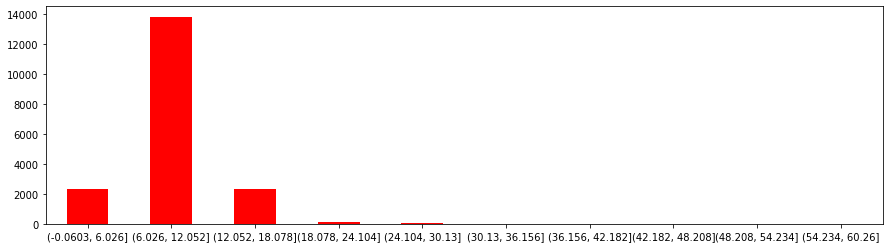

In [20]:
ax2 = out2.value_counts(sort=False).plot.bar(rot=0, color="r", figsize=(15,4))
plt.show()

### Count per Surface Type

In [21]:
#Show percentage of roads per surface type
100*report['surf_type'].value_counts(normalize=True).head(15)
#report.columns

BITM    91.306235
BLCK     4.835296
CONC     3.071580
SRFD     0.423292
RASH     0.352743
OTHR     0.010854
Name: surf_type, dtype: float64

In [22]:
report.groupby(['hierarchy','surf_type']).agg({'surf_type': ['count']})

surf_type
                                       count
hierarchy                surf_type          
L1 Local Distributor     BITM           1068
                         BLCK             10
                         RASH              9
                         SRFD              3
L2 Local Access          BITM          14033
                         BLCK            878
                         CONC            563
                         OTHR              2
                         RASH             30
                         SRFD             65
L3 Surfaced PRoW         BITM              3
MN Main Distributor      BITM            811
                         CONC              1
                         RASH              1
                         SRFD              1
No Code Allocated        CONC              1
PR Primary Distributor   BITM            328
                         CONC              1
                         RASH              3
SD Secondary Distributor BITM            582
                         BLCK              3
                         RASH             22
                         SRFD              9

In [23]:
report.loc[report['feature_id']=='A1081/130']

,feature_id,site_id,site_name,locality,town,location,hierarchy,roadclass,customer,area_name,distance,ward,road_type_hw,urban_rural,feat_cent_east,feat_cent_north,ward_code,surf_type,width,road_type,road_hierarchy,feature_key
asset_id,,,,,,,,,,,,,,,,,,,,,,
HWCW526912,A1081/130,37307803,Harpenden Road,NaN,St Albans,Beech Road To 40mph Signs,MN Main Distributor,Principal Road - A,HH: Hertfordshire Highways,MW: 6-St Albans Area,895.0,Harpenden Rural,Single 2-Lane Carriageway,Urban,515058,209204.47,ED45,BITM,12.2,S2,3A,395998


In [25]:
100*report['road_type_hw'].value_counts(normalize=True)

Single 2-Lane Carriageway         89.900899
Dual 2 Lane                        2.298733
Single Lane Carriageway            2.201676
Roundabout                         2.099510
Carriageway Oneway 2-Lane          1.460973
Carriageway Oneway 1-Lane          1.026767
Slip/Feeder Road Oneway 2-Lane     0.255415
Slip/Feeder Road Oneway 1-Lane     0.245198
Carriageway Oxbow-Layby            0.245198
Slip/Feeder Road Single 2-Lane     0.066408
Dual 1 Lane                        0.066408
Dual 3 Lane                        0.051083
Carriageway Oneway 3-Lane          0.035758
Single 3-Lane Carriageway          0.020433
Not Allocated                      0.010217
Slip/Feeder Road Dual 2-Lane       0.010217
Shared Cycleway Footway            0.005108
Name: road_type_hw, dtype: float64